<a href="https://colab.research.google.com/github/anoushka2006/NLP-for-Finance/blob/main/NLP_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NLP for Finance**
By Anoushka Chaudhury

---

A Natural language Processing (NLP) model that analyzes financial news and evaluates market sentiment. It performs sentiment analysis on stock market news - categorizing the news as positive, negative or neutral - for finance domains

#**Understanding sentiment analysis within the domain of finance**


In [ ]:
#@title To setup the libraries and download the dataset { display-mode: "form" }
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('wordnet')

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def plot_word_cloud(text):
  text = text.Sentence.values
  wordcloud = WordCloud(
      width = 3000,
      height = 2000,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(text))
  fig = plt.figure(
      figsize = (10, 7),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

def preprocess_data(df):
  sentences = df.Sentence.values
  labels = df.Label.values
  tokenized_sentences = [word_tokenize(word) for word in sentences]
  filtered_sentences = [remove_stopwords(word) for word in tokenized_sentences]
  return filtered_sentences, labels

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(7,6))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

if 'not' in STOPWORDS:
  STOPWORDS.remove('not')
if 'no' in STOPWORDS:
  STOPWORDS.remove('no')

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
STOPWORD_SET = set(stopwords.words('english'))
SAMPLE_SENTENCE = word_tokenize('I need to remove all these meaningless stopwords.')
SAMPLE_SOLUTION = ['I', 'need', 'remove', 'meaningless', 'stopwords', '.']

plt.rcParams.update({'font.size': 22})
print ("Train & Test Files are loaded")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


--2024-10-02 10:27:56--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.212.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv’

finance_test.csv    100%[===================>]  28.58K  --.-KB/s    in 0s      

2024-10-02 10:27:56 (68.4 MB/s) - ‘finance_test.csv’ saved [29264/29264]

--2024-10-02 10:27:57--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.212.207, 173.194.215.207, ...
Connecting to storage.google

**Finance Train:** contains all the raw input sentences and their sentiment labels

**Finance Test:** cotains a set of raw input sentences that we need to predict the sentiment of.

In [ ]:
# dataframe for Finance Train
df_train = get_finance_train()
print(df_train.head())

                                                                                              Sentence  \
0                                                 Autotank Group is part of Aspo 's Systems Division .   
1  The contract includes design , construction , delivery of equipment , installation and commissio...   
2  Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...   
3  The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...   
4  The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...   

   Label  
0      1  
1      1  
2      2  
3      1  
4      2  


In [ ]:
# number of sentences in the Finance Train dataset
print('There are a total of {} examples in the Finance Train dataset.'.format(df_train.shape[0]))

There are a total of 2037 examples in the Finance Train dataset.


Columns in the dataset:
1. `Sentence`: snippet or sentence from a new financial outlet
2. `Label`: the sentiment


In [ ]:
# dataframe fr Finance Test
df_test = get_finance_test()
print(df_test.head())

                                                                                              Sentence  \
0  In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating prof...   
1  Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the c...   
2                                               Financing of the project will come mainly from China .   
3  Sukhraj Dulai , of the 2900 block of Boni Sue Court , a cul-de-sac on the city 's north side , s...   
4  Finland 's leading metals group Outokumpu said its fourth-quarter net profit more than tripled o...   

   Label  
0      2  
1      2  
2      1  
3      1  
4      2  


In [ ]:
# number of sentences in the Finance Test dataset
print('There are a total of {} examples in the Finance Test dataset.'.format(df_test.shape[0]))

There are a total of 227 examples in the Finance Test dataset.


In [ ]:
# Concrete mapping to the labels to effectively interpret the sentiment
print(LABEL_MAP)

{0: 'negative', 1: 'neutral', 2: 'positive'}


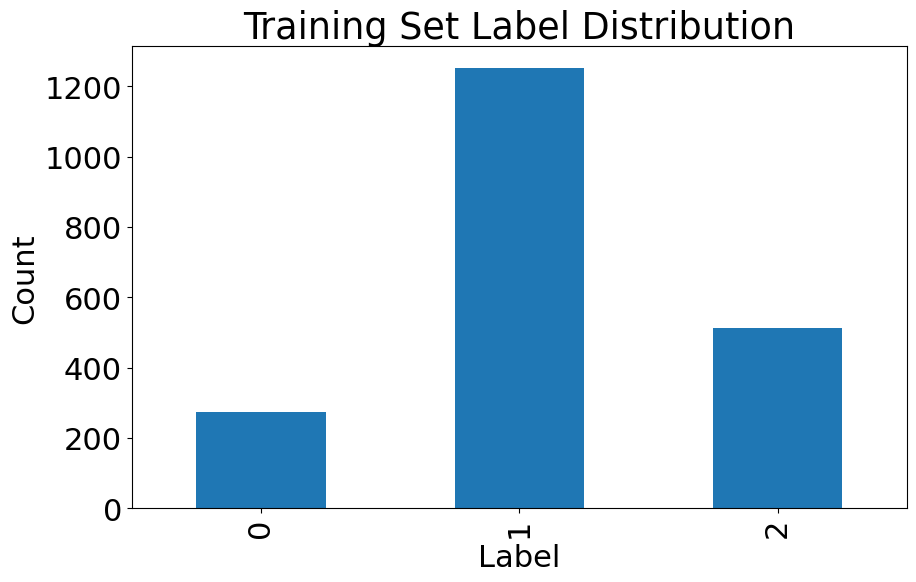

In [ ]:
# plot of the number of sentences in each respective category
fig = plt.figure(figsize=(10,6))
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
df_train.groupby('Label').Sentence.count().plot.bar(ylim=0)
plt.show()

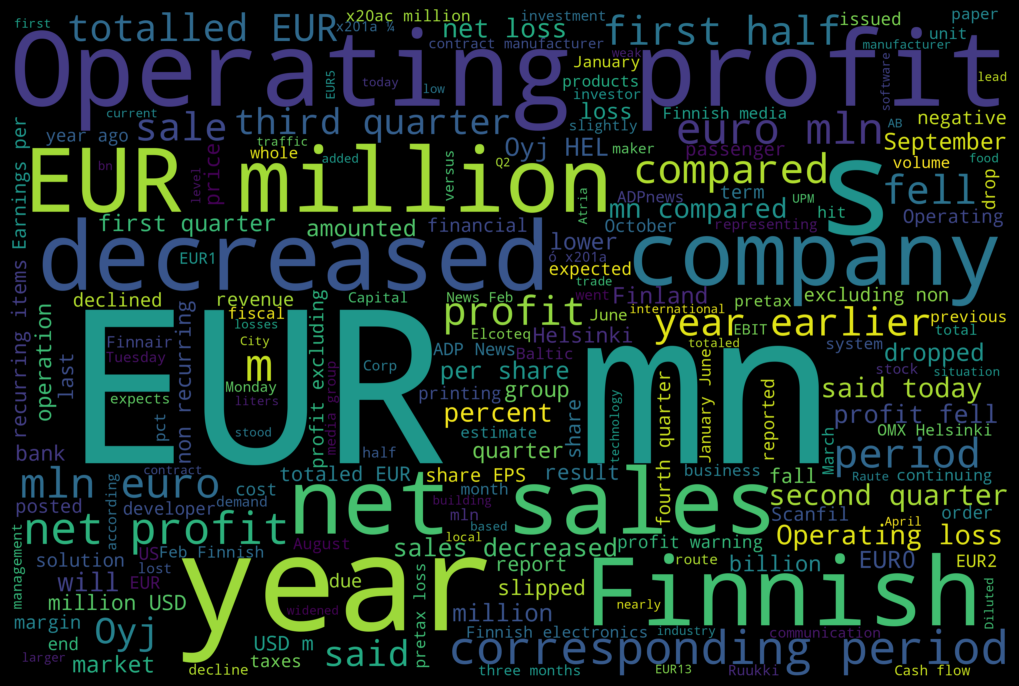

In [ ]:
# negative data word cloud
negative_data = df_train[df_train['Label'] == 0]
plot_word_cloud(negative_data)

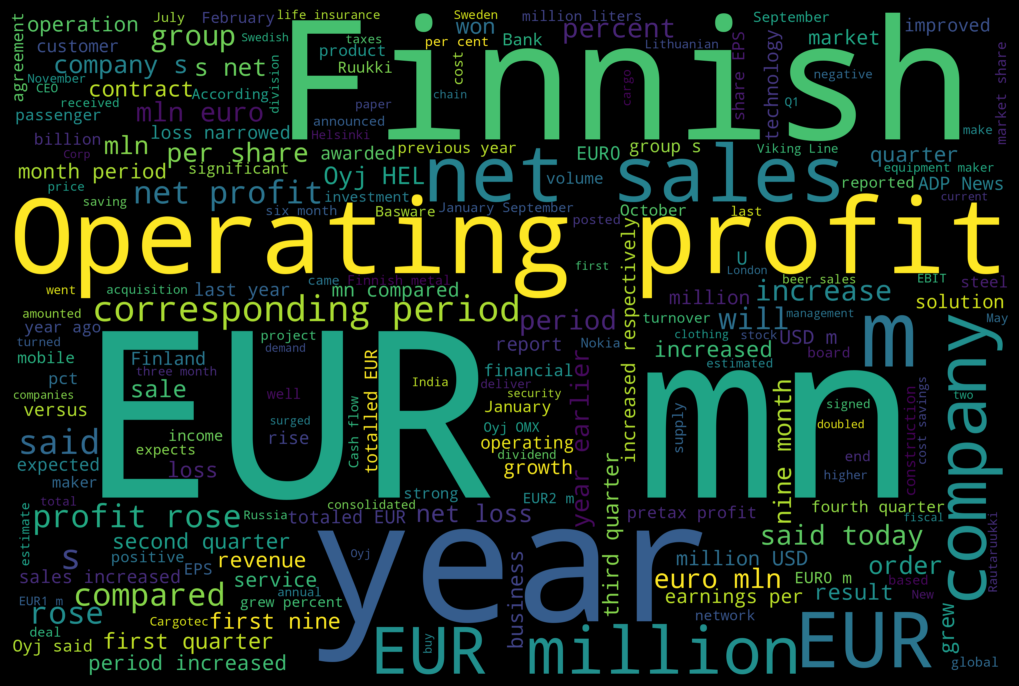

In [ ]:
# positive data word cloud
positive_data = df_train[df_train['Label'] == 2]
plot_word_cloud(positive_data)

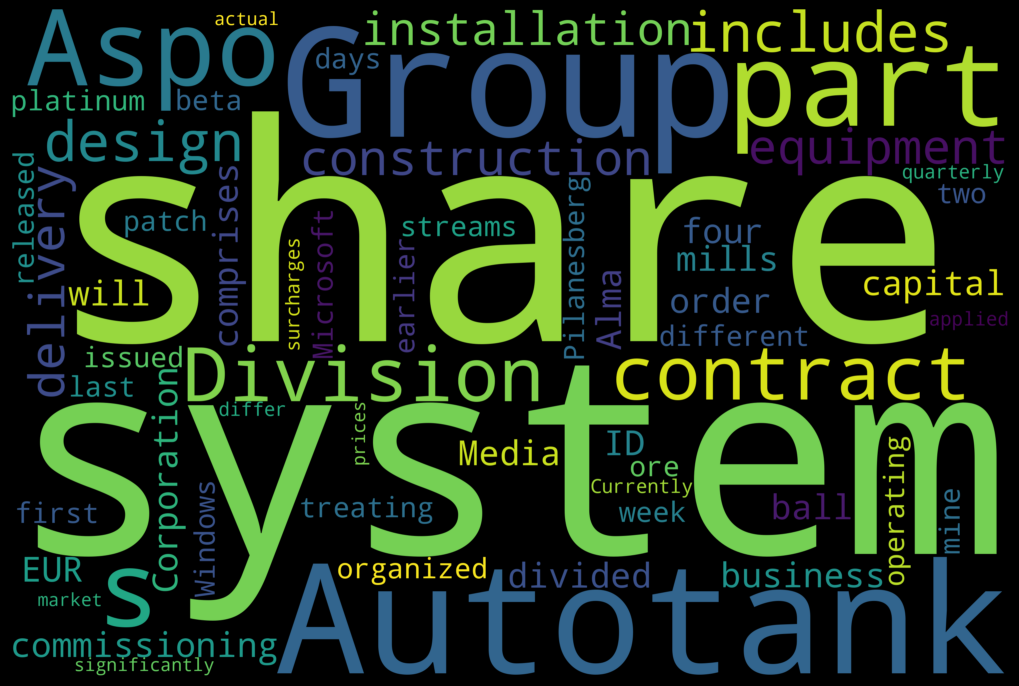

In [ ]:
# neutral data word cloud
neutral_data = df_train[df_train['Label'] == 1]
plot_word_cloud(neutral_data)

In [ ]:
#@title Tokenizing
sentence = "I am a designer" #@param {type:'string'}
tokens = word_tokenize(sentence)
tokens

['I', 'am', 'a', 'designer']

In [ ]:
#@title Stem words { run: "auto", vertical-output: true, display-mode: "form" }
stemmer = PorterStemmer()
word = "proposal" #@param {type:"string"}
print(stemmer.stem(word[:-1]))

pro


In [ ]:
# Stop words: holds common words that add noise or are advantageous to ignore these words
# They do not impact the meaning of the sentence
print(STOPWORD_SET)

{'my', 'these', "wasn't", 'doing', 'theirs', 'wasn', 'you', 'at', "don't", 'have', 'will', 'been', 'with', 'there', 'did', 'or', 'of', 'off', 'haven', 'when', 't', 's', 'just', 'd', 'what', 'then', 'both', 'ain', 'our', 'by', 'once', "won't", 'them', 'shan', 'their', 'had', 'out', 'under', 'few', 're', 'in', 'on', "you've", "hasn't", 'mightn', 'below', 'mustn', 'it', 'couldn', "isn't", 'until', 'nor', 'between', 'don', "shouldn't", 'against', 'here', 'as', 'after', "mustn't", "it's", 'do', 'didn', "hadn't", 'itself', 'its', 'each', "she's", 'a', 'an', "mightn't", 'if', 'too', 'me', 'weren', "didn't", 'only', 'i', 'again', 'doesn', "weren't", 'needn', 'shouldn', 'having', 'for', 'most', 'to', 'ourselves', "needn't", 'other', 'yours', 'we', 'above', 'all', 'y', 'o', 'who', "you'd", 'am', 'his', 'does', 'which', 'has', 'because', 'than', 'herself', 'yourself', 'themselves', 'being', "wouldn't", 'up', 'be', 'now', 'that', "shan't", 'll', 'are', 'was', 'the', 'during', 'himself', 'further',

In [ ]:
#@title Check If Stopword { run: "auto", vertical-output: true, display-mode: "form" }
word = "another\"" #@param {type:"string"}
if not word: raise Exception('Please enter a word')
eng_stopwords = set(stopwords.words('english'))
if word[:-1].lower().strip() in eng_stopwords: print('Yes,\"{}'' is a stopword.'.format(word))
else: print('No,\"{}'' is NOT a stopword.'.format(word))



No,"another" is NOT a stopword.


#**Data Filteration**


In [ ]:
# removing stop words
def remove_stopwords(tokenized_sentence):
  filtered_sentence = []
  for w in tokenized_sentence:
    if w not in STOPWORD_SET: filtered_sentence.append(w)
  return filtered_sentence

In [ ]:
# example sentence filtration
remove_stopwords(SAMPLE_SENTENCE)

['I', 'need', 'remove', 'meaningless', 'stopwords', '.']

In [ ]:
# Preprocessing data to filter sentences and their respective labels
train_sentences, train_labels = preprocess_data(df_train)
for sentence in train_sentences[:3]:
    print(sentence)

['Autotank', 'Group', 'part', 'Aspo', "'s", 'Systems', 'Division', '.']
['The', 'contract', 'includes', 'design', ',', 'construction', ',', 'delivery', 'equipment', ',', 'installation', 'commissioning', '.']
['Rapala', 'said', 'estimates', 'make', 'savings', '1-2', 'mln', 'eur', 'year', 'centralising', 'French', 'operations', 'one', 'site', '.']


In [ ]:
test_sentences, test_labels = preprocess_data(df_test)
for sentence in test_sentences[:3]:
    print(sentence)

['In', 'third', 'quarter', '2010', ',', 'net', 'sales', 'increased', '5.2', '%', 'EUR', '205.5', 'mn', ',', 'operating', 'profit', '34.9', '%', 'EUR', '23.5', 'mn', '.']
['Foundries', 'division', 'reports', 'sales', 'increased', '9.7', '%', 'EUR', '63.1', 'mn', 'EUR', '57.5', 'mn', 'corresponding', 'period', '2006', ',', 'sales', 'Machine', 'Shop', 'division', 'increased', '16.4', '%', 'EUR', '41.2', 'mn', 'EUR', '35.4', 'mn', 'corresponding', 'period', '2006', '.']
['Financing', 'project', 'come', 'mainly', 'China', '.']


#**Baseline Model**

**Engineering Features**

In [ ]:
# List of sentences
all_sentences = ["Google AI made remarkable achievements in 2019.", "Google Stock was at its all time high"]

#Create instance of CountVectorizer() object
vectorizer = CountVectorizer()

# Tokenizes the text and builds the vocabulary
vectorizer.fit(all_sentences)

CountVectorizer()

In [ ]:
print(vectorizer.vocabulary_)

{'google': 5, 'ai': 2, 'made': 9, 'remarkable': 10, 'achievements': 1, 'in': 7, '2019': 0, 'stock': 11, 'was': 13, 'at': 4, 'its': 8, 'all': 3, 'time': 12, 'high': 6}


In [ ]:
# Encode sentences as a vectors
bag_of_words_matrix = vectorizer.transform(all_sentences).toarray()

# Print vectors
print(bag_of_words_matrix)

[[1 1 1 0 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 0 0 1 1 1]]


In [ ]:
print(bag_of_words_matrix.shape)

(2, 14)


**Logistics Regression for Sentiment Classification**

In [ ]:
# training model
def train_model(train_sentences, train_labels):
  """
  param: train_sentences - list of pre-processed sentences to train on
  param: train_labels - list of labels (positive, neutral, negative) for each sentence in train_sentences
  return: the vectorizer, the Logistic Regression model
  """
  train_sentences = [" ".join(t) for t in train_sentences]
  train_labels = [l for l in train_labels]

  # initialize CountVectorizer
  vectorizer = CountVectorizer()
  vectorizer.fit(train_sentences)

  # get the vector representation of train_sentences using the .fit() and .transform() methods
  train_vect = vectorizer.transform(train_sentences)

  #NOTE: Can also use train_vect = vectorizer.fit_transform(train_sentences)
  model = LogisticRegression()
  model.fit(train_vect, train_labels)

  return model, vectorizer

In [ ]:
model, train_vectorizer = train_model(train_sentences, train_labels)

In [ ]:
# testing model
def predict(test_sentences, test_labels, vectorizer, model):
  """
  param: test_sentences - list of pre-processed sentences to test the model
  param: vectorizer - the CountVectorizer from the train_model function
  param: model - the Logistic Regression model from the train_model function
  return: preds - the predictions of the model based on test_sentences
  """

  test_sentences = [" ".join(t) for t in  test_sentences]

  # get the vector representation of test_sentences using vectorizer's .transform method (no need to use .fit!)
  test_vect = vectorizer.transform(test_sentences)

  # predict the labels of test_sentences using the model's predict method on test_vect
  preds = model.predict(test_vect)

  acc = metrics.accuracy_score(test_labels, preds)
  return preds, acc

In [ ]:
y_predictions, test_accuracy = predict(test_sentences, test_labels, train_vectorizer, model)
print('The model had an accuracy of {:.2%} on the test dataset'.format(test_accuracy))

The model had an accuracy of 85.46% on the test dataset


**Visualize results using a confusion matrix**

Plotting the Confusion Matrix


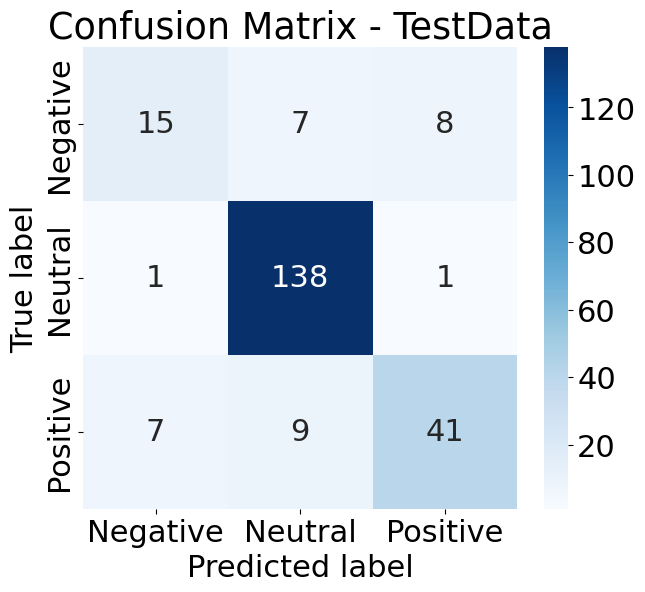

In [ ]:
plot_confusion_matrix(test_labels, y_predictions)

#**Advanced Model**

<font color="#de3023"><h5><b>**NOTE:** We'll need to use a GPU for this section. Go to "Runtime" -> "Change runtime type" -> and set Hardware Accelerator to "GPU."</b></h5></font>

In [ ]:
#@title Run to load the datasets and setup the environment. { display-mode: "form" }
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
import string

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(7,6))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    # text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

def run_model(X_train, y_train, X_test, y_test, epochs=5, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300

plt.rcParams.update({'font.size': 22})

nltk.download('wordnet')

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

print ("Train & Test Files are loaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'torchtext'

In [ ]:
df_train = get_finance_train()
df_test = get_finance_test()

In [ ]:
print(len(df_train))
df_train.head()

2037


,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Division .,1
1,"The contract includes design , construction , delivery of equipment , installation and commissio...",1
2,Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...,2
3,"The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...",1
4,The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...,2


In [ ]:
print(len(df_test))
df_test.head()

227


,Sentence,Label
0,"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating prof...",2
1,Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the c...,2
2,Financing of the project will come mainly from China .,1
3,"Sukhraj Dulai , of the 2900 block of Boni Sue Court , a cul-de-sac on the city 's north side , s...",1
4,Finland 's leading metals group Outokumpu said its fourth-quarter net profit more than tripled o...,2


In [ ]:
longest_sentence_index = np.argmax([len(x) for x in df_train['Sentence'].str.split(' ')])
longest_sentence = df_train.iloc[longest_sentence_index]['Sentence']
longest_sentence_length = len(longest_sentence.split(' '))
print('The longest sentence has length {} and is: \n\n{}'.format(longest_sentence_length, longest_sentence))

The longest sentence has length 81 and is: 

Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .


In [ ]:
print(PUNCTUATION)

NameError: name 'PUNCTUATION' is not defined

In [ ]:
sample_sentence = 'There, is-! a# lo?t of< pu>=nctuat-io!n he~re!'
print(sample_sentence)

There, is-! a# lo?t of< pu>=nctuat-io!n he~re!


In [ ]:
PUNCTUATION_RE = re.compile("[%s]" % PUNCTUATION)

NameError: name 'PUNCTUATION' is not defined

In [ ]:
filtered_sample_sentence = PUNCTUATION_RE.sub("", sample_sentence)
print(filtered_sample_sentence)

In [ ]:
example_sentence = 'No, th-at:/- is not,. how you w.rite a] pr!op$er sen^*tence'
print(example_sentence)
print(clean_text(example_sentence))

In [ ]:
train_example = df_train.iloc[100]['Sentence']
print(train_example)
print(clean_text(train_example))

In [ ]:
#@title To clean all the sentences in Finance Train and Finance Test.

df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)

In [ ]:
MAX_SEQUENCE_LENGTH = 256
MAX_NB_WORDS = 1000

In [ ]:
X_train = pad_sequences_train(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_train.shape))
print(X_train[0])

In [ ]:
X_test = pad_sequences_test(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_test.shape))

In [ ]:
y_train = pd.get_dummies(df_train['Label']).values
print(y_train.shape)

In [ ]:
y_test = pd.get_dummies(df_test['Label']).values
print(y_test.shape)

**Set up and Run model**

In [ ]:
n_labels = 3
label_map = {0 : "negative",
             1 : "neutral",
             2 : "positive"}

In [ ]:
#@title To instantiate the model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
# arbitrary values for now - changing them impacts our results
epochs = 5
batch_size = 64

In [ ]:
# to train model
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test set loss is {:} and accuracy is {:.2%}'.format(test_loss, test_accuracy))

In [ ]:
# Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

In [ ]:
#plotting accuracies
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [ ]:
# plotting both the training and validation accuracies on the same graph
fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

**Carrying out hyperparameter optimization to improve the model**

  * `epochs` : This was originally set to `5`. If set to too high, the model will take much longer to run
  * `MAX_NB_WORDS` : This was the max number of words we assumed the vocabulary would encompass for our model that was originally set to `1000`.
  * `EMBEDDING_DIM` : Although we did not describe this parameter, it represents the dimension of the embedding used for each of the individual words which thereby impacts the learned embedding for each sentence and was originally set to `300`. If we allow for larger embedding dimensions we may be able to capture more granularity in the model at the expense of overfitting.

The `run_model()` method will return 3 variables:
  1. `model` : This is the trained model.
  2. `history` : This contains loss and accuracy history over the epochs like before.
  3. `test_acc` : This is the test set accuracy that we will use to evaluate the success of the model.

In [ ]:
model, history, test_acc = run_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=6,
    max_nb_words=1500,
    embedding_dim=280
)
print('New test accuracy is {}'.format(test_acc))

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

In [ ]:
#plotting the confusion matrix
# Predict on our test set
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = - 1)
y_true = y_test.argmax(axis = - 1)

# plot the confusion matrix!
plot_confusion_matrix(y_true, y_pred)

#**Text Classification using BERT**

<font color="#de3023"><h5><b>**NOTE:** For this section, we'll need to use a GPU. Go to "Runtime" -> "Change runtime type" -> and set Hardware Accelerator to "GPU."</b></h5></font>

In [ ]:
#@title To download data and prepare our environment { display-mode: "form" }
!pip install transformers
import os
import gdown
import torch
import numpy as np
import seaborn as sns
import transformers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from sklearn import metrics

from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, BertConfig
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW

%matplotlib inline

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

print ("Train and Test Files Loaded as train.csv and test.csv")

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
NONE = 4 * [None]
RND_SEED=2020

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(14,12))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

**About BERT**

BERT is a pretrained NLP model that is more contextually aware than the models developed and built in this notebook.

Specifically, it is an NLP model designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on what precedes and succeeds a word. Therefore, it is better able to capture a word within the context of a sentence. Some other important highlights about BERT are signified below:

1. **Quick Training:**  BERT comes pre-trained, so we can train it on our data very quickly.

2. **Less Data:** Because BERT is pre-trained, we don't need as much training data.

3. **Great Results:** BERT has proven to be an excellent NLP model.

4. **Multi-Lingual Capabilities:** If we want to apply our network to foreign markets, BERT works on more than just English!

**Preprocessing data for BERT and training the model**

In [ ]:
df_train = get_finance_train()
df_test = get_finance_test()

In [ ]:
sentences = df_train['Sentence'].values
labels = df_train['Label'].values

**Step 1: Creating the tokenizer**

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True)

In [ ]:
print(tokenizer.vocab_size)

**Applying the tokenizer**

In [ ]:
original_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Original Sentence: ', original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)

In [ ]:
# mapping tokens to indices
inal_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)
print('Mapped Indices Sentence: ', tokenizer.convert_tokens_to_ids(tokenized_sentence))

**Special Tokens**

These are two tokens we add to the start and end respectively:



*   `[CLS]` - stands for "classification," and is used to identify new sentences.
*   `[SEP]` - stands for "separator," and identifies if a pair of sentences are consecutive in a corpus or not (used for next sentence prediction).


In [ ]:
sentences_with_special_tokens = []
for sentence in sentences:
  new_sentence = "[CLS] " + sentence + " [SEP]"
  sentences_with_special_tokens.append(new_sentence)
print(sentences_with_special_tokens[0])

In [ ]:
# tokenize the sentences
tokenized_texts = []
for sentence in sentences_with_special_tokens:
  tokenized_sentence = tokenizer.tokenize(sentence)
  tokenized_texts.append(tokenized_sentence)
print(tokenized_texts[0])

In [ ]:
# encoding tokenized sentences with indices
input_ids = []
for text in tokenized_texts:
  new_list = tokenizer.convert_tokens_to_ids(text)
  input_ids.append(new_list)
print(input_ids[0])

In [ ]:
# padding input
input_ids = pad_sequences(input_ids,
                          maxlen=128,
                          dtype="long",
                          truncating="post",
                          padding="post")
print(input_ids[0])

**Attention Masks**

In [ ]:
# Creating attention masks
attention_masks = []
for sequence in input_ids:
  mask = [float(i > 0) for i in sequence]
  attention_masks.append(mask)
print (attention_masks[0])

In [ ]:
# setting up data for BERT
X_train, X_val, y_train, y_val = train_test_split(input_ids,
                                                  labels,
                                                  test_size=0.15,
                                                  random_state=RND_SEED)

In [ ]:
train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                       input_ids,
                                                       test_size=0.15,
                                                       random_state=RND_SEED)

In [ ]:
#@title To convert data to tensors and create DataLoaders
train_inputs = torch.tensor(np.array(X_train));
validation_inputs = torch.tensor(np.array(X_val));
train_masks = torch.tensor(np.array(train_masks));
validation_masks = torch.tensor(np.array(validation_masks));
train_labels = torch.tensor(np.array(y_train));
validation_labels = torch.tensor(np.array(y_val));

batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels);
train_sampler = RandomSampler(train_data); # Samples data randonly for training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size);
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels);
validation_sampler = SequentialSampler(validation_data); # Samples data sequentially
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size);

**Running and finetuning the BERT model with the PyTorch huggingface transformer library**

In [ ]:
#@title To initialize the BertForSequenceClassification model
#Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT small model, with an uncased vocab.
    num_labels = 3,
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
);

# Given that this a huge neural network, we need to explicity specify
# in pytorch to run this model on the GPU.
model.cuda();

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, ### YOUR CODE HERE
                  eps = 1e-8
                )
epochs = 4

Training Steps:
*   Backward pass (backpropagation)
*   Clear out the gradients calculated in the previous pass
*   Update parameters
*   Unpack our data inputs and labels from the DataLoader objects
*   Forward pass (feed data through network)

In [ ]:
#@title To train the model

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# We'll store training and validation loss,
# validation accuracy, and timings.
training_loss = []
validation_loss = []
training_stats = []
for epoch_i in range(0, epochs):
    # Training
    print('Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training the model')
    # Reset the total loss for  epoch.
    total_train_loss = 0
    # Put the model into training mode.
    model.train()
    # For each batch of training data
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 20 == 0 and not step == 0:
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}. '.format(step, len(train_dataloader)))

        # STEP 1 & 2: Unpack this training batch from our dataloader.
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # STEP 3
        # Always clear any previously calculated gradients before performing a
        # backward pass.
        model.zero_grad()

        # STEP 4
        # Perform a forward pass (evaluate the model on this training batch).
        # It returns the loss (because we provided labels) and
        # the "logits"--the model outputs prior to activation.
        outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # STEP 5
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # STEP 6
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    # Validation
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("Evaluating on Validation Set")
    # Put the model in evaluation mode
    model.eval()
    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        #Step 1 and Step 2
        # Unpack this validation batch from our dataloader.

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # The "logits" are the output
            # values prior to applying an activation function like the softmax.
            outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)



    print("Validation Loss: {0:.2f}".format(avg_val_loss))


    training_loss.append(avg_train_loss)
    validation_loss.append(avg_val_loss)
    # Record all statistics from this epoch.

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy

        }
    )

print("Training complete!")

In [ ]:
# plotting the losses
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

In [ ]:
# evaluating test set accuracy
test_sentences = df_test.Sentence.values
test_labels = df_test.Label.values

In [ ]:
#@title To process and prepare the test data
test_input_ids, test_attention_masks = [], []

# Add Special Tokens
test_sentences = ["[CLS] " + sentence + " [SEP]" for sentence in test_sentences]

# Tokenize sentences
tokenized_test_sentences = [tokenizer.tokenize(sent) for sent in test_sentences]

# Encode Tokens to Word IDs
test_input_ids = [tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_test_sentences]

# Pad the inputs
test_input_ids = pad_sequences(test_input_ids,
                               maxlen=128,
                               dtype="long",
                               truncating="post",
                               padding="post")

# Create Attention Masks
for sequence in test_input_ids:
  mask = [float(i>0) for i in sequence]
  test_attention_masks.append(mask)

In [ ]:
#@title To convert data to tensors and create DataLoaders
batch_size = 32
test_input_ids = torch.tensor(test_input_ids)
test_attention_masks = torch.tensor(test_attention_masks)
test_labels = torch.tensor(test_labels)
prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
#@title Evaluating Test Set Accuracy
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

# Final tracking variables
y_logits, y_true, y_preds = [], [], []

# Gather logit predictions
for chunk in predictions:
  for logits in chunk:
    y_logits.append(logits)

# Gather true labels
for chunk in true_labels:
  for label in chunk:
    y_true.append(label)

# Gather real predictions
for logits in y_logits:
  y_preds.append(np.argmax(logits))

print ('Test Accuracy: {:.2%}'.format(metrics.accuracy_score(y_preds,y_true)))
plot_confusion_matrix(y_true,y_preds)